# Los Angeles Metro Bike Share -- Geospatial Analysis

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting map using folium

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# Import ".json" file for bike stations

bike_station = r'C:\Users\ashan\OneDrive\桌面\Data Analytic\Metro Bike Share\02 Data\Bike station locations.json'

In [4]:
bike_station

'C:\\Users\\ashan\\OneDrive\\桌面\\Data Analytic\\Metro Bike Share\\02 Data\\Bike station locations.json'

In [5]:
# Import path
path = r'C:\Users\ashan\OneDrive\桌面\Data Analytic\Metro Bike Share' 

In [6]:
# Import data for bike trips
df =  pd.read_csv(os.path.join(path,'02 Data','Prepared Data','Cleaned_2023.csv'), index_col = 0)

In [7]:
# Import data for bike station information
station = pd.read_csv(os.path.join(path,'02 Data','Original Data','Preclean-metro-bike-share-stations.csv'), encoding='latin1')

In [8]:
df.head()

,trip_id,duration,fare_without_discount,start_time,month,day_of_month,time_of_start,day_of_week,end_time,start_station,...,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,fare,subscription
0,231787362,9,1.75,1/1/2023 0:41,1,1,0,1,1/1/2023 0:50,4204,...,4210,33.984341,-118.471550,23373,30,One Way,Monthly Pass,electric,0.00,17
1,231801471,97,7.00,1/1/2023 1:05,1,1,1,1,1/1/2023 2:42,3054,...,3054,34.039219,-118.236488,13870,1,Round Trip,Walk-up,standard,7.00,0
2,231794062,15,1.75,1/1/2023 1:11,1,1,1,1,1/1/2023 1:26,3037,...,3068,34.053200,-118.250954,23942,1,One Way,Walk-up,electric,2.75,0
3,231794664,26,1.75,1/1/2023 1:31,1,1,1,1,1/1/2023 1:57,3063,...,4454,34.017899,-118.291718,22873,1,One Way,Walk-up,electric,2.75,0
4,231794562,8,1.75,1/1/2023 1:44,1,1,1,1,1/1/2023 1:52,3066,...,3026,34.063179,-118.245880,14790,1,One Way,Walk-up,standard,1.75,0


In [9]:
df.shape

(433658, 22)

In [10]:
station.head()

,Station_ID,Station_Name,Region,Status,Latitude,Longitude
0,3005,7th & Flower,Downtown LA,Active,34.048500,-118.258537
1,3006,Olive & 8th,Downtown LA,Active,34.045540,-118.256668
2,3007,5th & Grand,Downtown LA,Active,34.050480,-118.254593
3,3008,Figueroa & 9th,Downtown LA,Active,34.046612,-118.262733
4,3010,11th & Maple,Downtown LA,Active,34.037048,-118.254868


In [11]:
station.shape

(409, 6)

### 2. Data Wrangling

In [12]:
df.columns

Index(['trip_id', 'duration', 'fare_without_discount', 'start_time', 'month',
       'day_of_month', 'time_of_start', 'day_of_week', 'end_time',
       'start_station', 'start_lat', 'start_lon', 'end_station', 'end_lat',
       'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'bike_type', 'fare', 'subscription'],
      dtype='object')

In [13]:
# Count bike trip start stations
start_sta = df['start_station'].value_counts()
start_sta

start_station
4214    21873
4215    15802
4210    13363
3005    11900
3035    11148
        ...  
4648       10
4654        9
4636        3
4651        1
4663        1
Name: count, Length: 237, dtype: int64

In [14]:
# Count bike trip end stations
end_sta = df['end_station'].value_counts()
end_sta

end_station
4215    20854
4214    18697
4210    13301
3005    12365
3035    11292
        ...  
4663       17
4649       16
4656       14
4654       10
4651        1
Name: count, Length: 239, dtype: int64

In [15]:
# Turn popular bike station count into dataframe
df_sta = start_sta.to_frame()

# Reset datafram index
df_sta.reset_index(inplace=True)

df_sta.head(10)

,start_station,count
0,4214,21873
1,4215,15802
2,4210,13363
3,3005,11900
4,3035,11148
5,3006,7038
6,4543,6397
7,3064,6284
8,4212,5818
9,4544,5745


In [16]:
# Turn popular bike station count into dataframe
df_end = end_sta.to_frame()

# Reset datafram index
df_end.reset_index(inplace=True)

df_end.head(10)

,end_station,count
0,4215,20854
1,4214,18697
2,4210,13301
3,3005,12365
4,3035,11292
5,3006,6853
6,4543,6419
7,3064,6214
8,4544,5779
9,4491,5418


In [17]:
# Popular bike trip route

route = df[['start_station', 'end_station']].value_counts()

route.head(10)

start_station  end_station
4214           4214           8126
               4215           6334
4210           4210           4357
4215           4215           4016
4544           4544           3624
4543           4543           3262
4215           4214           3210
4210           4215           3055
4214           4210           2961
4210           4214           2624
Name: count, dtype: int64

In [18]:
# Rename start_station and end_station to Station_ID to match the column with station dataset
df_sta.rename(columns = {'start_station' : 'Station_ID'}, inplace = True)
df_end.rename(columns = {'end_station' : 'Station_ID'}, inplace = True)

In [25]:
# Popular bike station

top_station = df_sta.merge(df_end, on = 'Station_ID', how = 'inner', indicator = True)
top_station.head(20)

,Station_ID,count_x,count_y,_merge
0,4214,21873,18697,both
1,4215,15802,20854,both
2,4210,13363,13301,both
3,3005,11900,12365,both
4,3035,11148,11292,both
5,3006,7038,6853,both
6,4543,6397,6419,both
7,3064,6284,6214,both
8,4212,5818,5348,both
9,4544,5745,5779,both


In [26]:
top_station.columns

Index(['Station_ID', 'count_x', 'count_y', '_merge'], dtype='object')

In [27]:
top_station['count'] = top_station['count_x'] + top_station['count_y']

In [28]:
top_station.head(20)

,Station_ID,count_x,count_y,_merge,count
0,4214,21873,18697,both,40570
1,4215,15802,20854,both,36656
2,4210,13363,13301,both,26664
3,3005,11900,12365,both,24265
4,3035,11148,11292,both,22440
5,3006,7038,6853,both,13891
6,4543,6397,6419,both,12816
7,3064,6284,6214,both,12498
8,4212,5818,5348,both,11166
9,4544,5745,5779,both,11524


C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

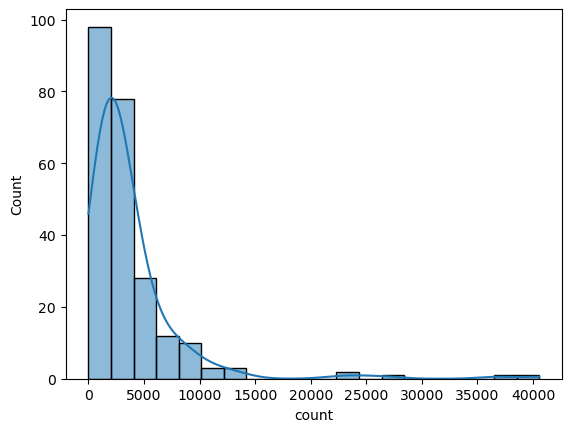

In [29]:
sns.histplot(top_station['count'], bins=20, kde = True)

In [30]:
# Merge start_station data with station dataset
start_station = df_sta.merge(station, on = 'Station_ID', how = 'inner', indicator = True)
start_station

,Station_ID,count,Station_Name,Region,Status,Latitude,Longitude,_merge
0,4214,21873,Ocean Front Walk & Navy,Westside,Active,33.995560,-118.481552,both
1,4215,15802,Downtown Santa Monica E Line Station,Westside,Active,34.014309,-118.491341,both
2,4210,13363,Ocean Front Walk & North Venice,Westside,Active,33.984341,-118.471550,both
3,3005,11900,7th & Flower,Downtown LA,Active,34.048500,-118.258537,both
4,3035,11148,Figueroa & 8th,Downtown LA,Active,34.048401,-118.260948,both
...,...,...,...,...,...,...,...,...
232,4648,10,CicLAvia Mid City Hub,Downtown LA,Inactive,34.040619,-118.344971,both
233,4654,9,Culver City Pride Ride,Westside,Inactive,34.027988,-118.377937,both
234,4636,3,CicLAvia - Mariachi Plaza Hub,Downtown LA,Inactive,34.025742,-118.238068,both
235,4651,1,CicLAmini Watts,Downtown LA,Inactive,33.943508,-118.262680,both


In [31]:
# Merge end_station data with station dataset
end_station = df_end.merge(station, on = 'Station_ID', how = 'inner', indicator = True)
end_station

,Station_ID,count,Station_Name,Region,Status,Latitude,Longitude,_merge
0,4215,20854,Downtown Santa Monica E Line Station,Westside,Active,34.014309,-118.491341,both
1,4214,18697,Ocean Front Walk & Navy,Westside,Active,33.995560,-118.481552,both
2,4210,13301,Ocean Front Walk & North Venice,Westside,Active,33.984341,-118.471550,both
3,3005,12365,7th & Flower,Downtown LA,Active,34.048500,-118.258537,both
4,3035,11292,Figueroa & 8th,Downtown LA,Active,34.048401,-118.260948,both
...,...,...,...,...,...,...,...,...
233,4636,19,CicLAvia - Mariachi Plaza Hub,Downtown LA,Inactive,34.025742,-118.238068,both
234,4663,17,CicLAvia South LA - Historic South Central,Downtown LA,Inactive,34.023399,-118.251671,both
235,4656,14,CicLAvia South LA - Westmont Hub,Downtown LA,Inactive,33.958462,-118.292000,both
236,4654,10,Culver City Pride Ride,Westside,Inactive,34.027988,-118.377937,both


In [32]:
# Merge start_station data with station dataset
station_addr = top_station.merge(station, on = 'Station_ID', how = 'inner')
station_addr

,Station_ID,count_x,count_y,_merge,count,Station_Name,Region,Status,Latitude,Longitude
0,4214,21873,18697,both,40570,Ocean Front Walk & Navy,Westside,Active,33.995560,-118.481552
1,4215,15802,20854,both,36656,Downtown Santa Monica E Line Station,Westside,Active,34.014309,-118.491341
2,4210,13363,13301,both,26664,Ocean Front Walk & North Venice,Westside,Active,33.984341,-118.471550
3,3005,11900,12365,both,24265,7th & Flower,Downtown LA,Active,34.048500,-118.258537
4,3035,11148,11292,both,22440,Figueroa & 8th,Downtown LA,Active,34.048401,-118.260948
...,...,...,...,...,...,...,...,...,...,...
232,4648,10,41,both,51,CicLAvia Mid City Hub,Downtown LA,Inactive,34.040619,-118.344971
233,4654,9,10,both,19,Culver City Pride Ride,Westside,Inactive,34.027988,-118.377937
234,4636,3,19,both,22,CicLAvia - Mariachi Plaza Hub,Downtown LA,Inactive,34.025742,-118.238068
235,4651,1,1,both,2,CicLAmini Watts,Downtown LA,Inactive,33.943508,-118.262680


In [33]:
station_addr.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'top station address.csv'))

In [34]:
start_station.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'start_station.csv'))
end_station.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'end_station.csv'))

### 3. Data Cleaning

In [35]:
# Check missing vlaue
start_station.isnull().sum()  # No missing value

Station_ID      0
count           0
Station_Name    0
Region          0
Status          0
Latitude        0
Longitude       0
_merge          0
dtype: int64

In [36]:
# Check missing vlaue
end_station.isnull().sum()  # No missing value

Station_ID      0
count           0
Station_Name    0
Region          0
Status          0
Latitude        0
Longitude       0
_merge          0
dtype: int64

In [37]:
# Check duplicates
dups = start_station.duplicated()
dups.shape  # No duplicates

(237,)

In [38]:
# Check duplicates
dups2 = end_station.duplicated()
dups2.shape  # No duplicates

(238,)

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

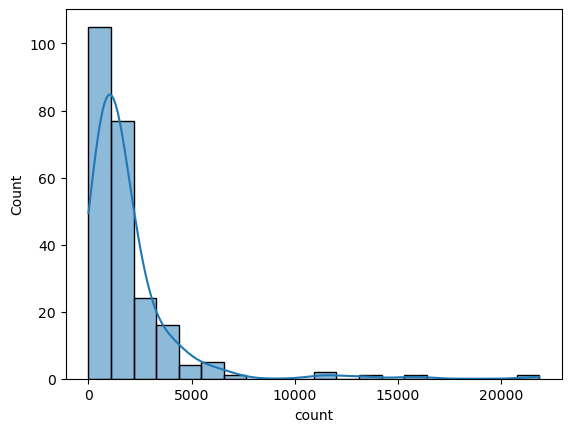

In [39]:
# Extreme value check
sns.histplot(start_station['count'], bins=20, kde = True)

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

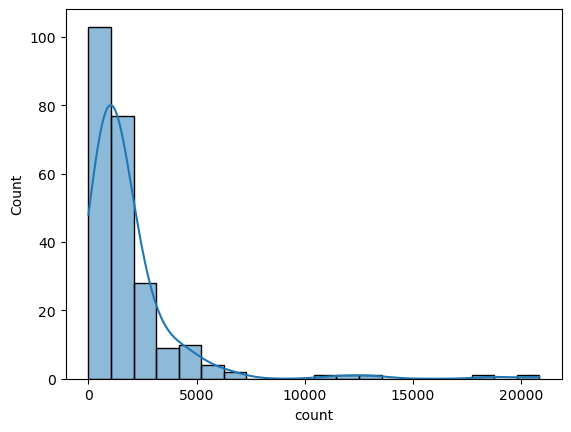

In [40]:
# Extreme value check
sns.histplot(end_station['count'], bins=20, kde = True)

###### From the histogram of stations count during 2023, we can see that  some stations were very popular with over 5000 bike trips from there, while some stations were barely used. Thus, two directions we can delve deeper. One is that investigating the popular stations so that more bike docks can be installed for high demand. Another direction is investigating the low usuage stations and reconsider if it is still worth to keep stations there. 

In [41]:
# Filter out low usuage stations
top_use_sta = start_station[start_station['count'] > 5000]

top_use_sta

,Station_ID,count,Station_Name,Region,Status,Latitude,Longitude,_merge
0,4214,21873,Ocean Front Walk & Navy,Westside,Active,33.995560,-118.481552,both
1,4215,15802,Downtown Santa Monica E Line Station,Westside,Active,34.014309,-118.491341,both
2,4210,13363,Ocean Front Walk & North Venice,Westside,Active,33.984341,-118.471550,both
3,3005,11900,7th & Flower,Downtown LA,Active,34.048500,-118.258537,both
4,3035,11148,Figueroa & 8th,Downtown LA,Active,34.048401,-118.260948,both
5,3006,7038,Olive & 8th,Downtown LA,Active,34.045540,-118.256668,both
6,4543,6397,Toes Beach at Culver Blvd,Westside,Active,33.957180,-118.451248,both
7,3064,6284,Grand & 8th,Downtown LA,Active,34.046131,-118.257591,both
8,4212,5818,Windward & Main,Westside,Active,33.988129,-118.471741,both
9,4544,5745,Dockweiler Beach at Imperial Hwy,Westside,Active,33.928459,-118.435204,both


In [42]:
# Filter out low usuage stations
top_use_end = end_station[end_station['count'] > 5000]

top_use_end

,Station_ID,count,Station_Name,Region,Status,Latitude,Longitude,_merge
0,4215,20854,Downtown Santa Monica E Line Station,Westside,Active,34.014309,-118.491341,both
1,4214,18697,Ocean Front Walk & Navy,Westside,Active,33.995560,-118.481552,both
2,4210,13301,Ocean Front Walk & North Venice,Westside,Active,33.984341,-118.471550,both
3,3005,12365,7th & Flower,Downtown LA,Active,34.048500,-118.258537,both
4,3035,11292,Figueroa & 8th,Downtown LA,Active,34.048401,-118.260948,both
5,3006,6853,Olive & 8th,Downtown LA,Active,34.045540,-118.256668,both
6,4543,6419,Toes Beach at Culver Blvd,Westside,Active,33.957180,-118.451248,both
7,3064,6214,Grand & 8th,Downtown LA,Active,34.046131,-118.257591,both
8,4544,5779,Dockweiler Beach at Imperial Hwy,Westside,Active,33.928459,-118.435204,both
9,4491,5418,Main & Winston,Downtown LA,Active,34.047440,-118.247940,both


### 4. Plotting a map with folium

In [43]:
# Creat data frame with station location and usuage count

plot_sta = top_use_sta[['Latitude','Longitude','count']]
plot_sta.head()

,Latitude,Longitude,count
0,33.995560,-118.481552,21873
1,34.014309,-118.491341,15802
2,33.984341,-118.471550,13363
3,34.048500,-118.258537,11900
4,34.048401,-118.260948,11148


In [44]:
# Creat data frame with station location and usuage count

plot_end = top_use_end[['Latitude','Longitude','count']]
plot_end.head()

,Latitude,Longitude,count
0,34.014309,-118.491341,20854
1,33.995560,-118.481552,18697
2,33.984341,-118.471550,13301
3,34.048500,-118.258537,12365
4,34.048401,-118.260948,11292


#### The nature of the geo data in this project are for the exact locations not for the regions. The 'Region' in the top_use data frame are too small to be defined in a geojson file. Thus the Choropleth map is not the optimum tool to show the insights. Instead, I used circlemarker in folium library to show the location of the popular stations and the size of the circle indicate the volumn of the usuage of the station.

In [45]:
# Popular trip start stations
# Initialize the map
m = folium.Map(location=[34.052235, -118.243683], zoom_start=11)

# Add circle markers for each data point
for index, data_point in plot_sta.iterrows():
    folium.CircleMarker(
        location=[data_point['Latitude'], data_point['Longitude']],
        radius=data_point['count'] / 1000, 
        fill_color='#FDC441',
        fill_opacity=0.6,
        color = '#823d32',
        weight = 2
    ).add_to(m)

# Display the map
m

In [47]:
# Popular end stations

# Initialize the map
m2 = folium.Map(location=[34.052235, -118.243683], zoom_start=11)

# Add circle markers for each data point
for index, data_point in plot_end.iterrows():
    folium.CircleMarker(
        location=[data_point['Latitude'], data_point['Longitude']],
        radius=data_point['count'] / 1000,  
        fill_color='#EF6177',
        fill_opacity=0.6,
        color = '#373250',
        weight = 2
    ).add_to(m2)

# Display the map
m2

In [48]:
# Save the map
m.save('plot_data.html')

In [49]:
# Save the map
m2.save('plot_data2.html')

Findings:
* The stations that had over 5000 trips were located in Westside and Downtown, Los Angletes. 

* Westside, Los Angletes has the most bike trips from start to end.

Remain Questions:
* How long the duration of those bike trips that in Downtown and Westside?
* Are there any change by month, days, times for the popularity of thoses stations?
* Any pattern of usuage for those bike trips in Downtown and Westside?